In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics, model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [17]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [18]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [19]:
df.drop(columns=["Unnamed: 32"], inplace=True)

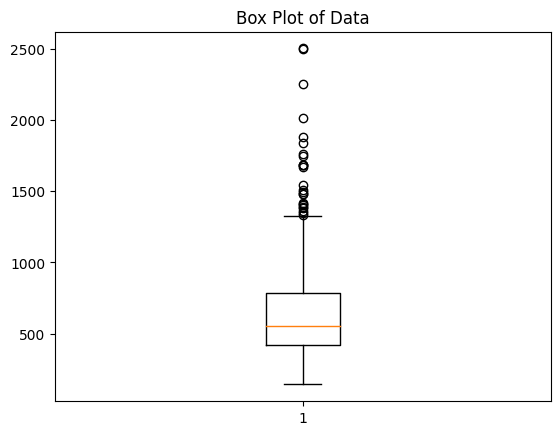

In [20]:
plt.boxplot(df["area_mean"])
plt.title('Box Plot of Data')
plt.show()

In [21]:
target_mapping = {'M': 0, 'B': 1}

df["diagnosis"] = df["diagnosis"].replace(target_mapping)

In [22]:
X = df.drop(columns = ["diagnosis"])
Y = df["diagnosis"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
pr = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f'Accuracy Score : {acc}')
print(f'Precision Score : {pr}')
print(f'Recall Score : {recall}')
print(f'F1 Score : {f1}')

Accuracy Score : 0.6228070175438597
Precision Score : 0.6228070175438597
Recall Score : 1.0
F1 Score : 0.7675675675675676


In [24]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
pr = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f'Accuracy Score : {acc}')
print(f'Precision Score : {pr}')
print(f'Recall Score : {recall}')
print(f'F1 Score : {f1}')

Accuracy Score : 0.9385964912280702
Precision Score : 0.9571428571428572
Recall Score : 0.9436619718309859
F1 Score : 0.9503546099290779


In [28]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
pr = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f'Accuracy Score : {acc}')
print(f'Precision Score : {pr}')
print(f'Recall Score : {recall}')
print(f'F1 Score : {f1}')

Accuracy Score : 0.9649122807017544
Precision Score : 0.958904109589041
Recall Score : 0.9859154929577465
F1 Score : 0.9722222222222222


In [26]:
model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
pr = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f'Accuracy Score : {acc}')
print(f'Precision Score : {pr}')
print(f'Recall Score : {recall}')
print(f'F1 Score : {f1}')

Accuracy Score : 0.6228070175438597
Precision Score : 0.6228070175438597
Recall Score : 1.0
F1 Score : 0.7675675675675676


### We choose Random Forest algorithme cause because he has the greater accuracy score with 0.96

In [27]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()